In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import numpy as np
from statsmodels.tsa.stattools import adfuller,kpss
import pandas as pd
from matplotlib import pyplot as plt
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
from statsmodels.tools.sm_exceptions import InterpolationWarning
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.lpcmci import LPCMCI
import seaborn as sns
from tqdm import tqdm
import time
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import pandas as pd

# Define the data for each table
data_1 = {
    "Data": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "Elapsed Time (s)": [94.655152, 100.808934, 124.678295, 302.720707, 78.231628, 
                         72.866141, 104.366418, 79.696465, 121.020400, 187.937017],
    "F1 Score": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "CMI": [0.291472, 0.334062, 0.408666, 0.242574, 0.355476, 0.312095, 0.309530, 
            0.433259, 0.334345, 0.262773],
    "Recall": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

data_2 = {
    "Data": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "Elapsed Time (s)": [1106.812213, 1238.472184, 918.151631, 660.727423, 683.547585, 
                         523.312134, 1327.087492, 1131.440494, 1014.501928, 1206.329295],
    "F1 Score": [0.160000, 0.000000, 0.090909, 0.090909, 0.000000, 0.095238, 0.160000, 
                 0.000000, 0.000000, 0.000000],
    "CMI": [0.237765, 0.232632, 0.265011, 0.281807, 0.228636, 0.259721, 0.202110, 
            0.201718, 0.230153, 0.195928],
    "Recall": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

data_3 = {
    "Data": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "Elapsed Time (s)": [994.457309, 895.388710, 942.229353, 905.086350, 866.833991, 
                         805.892575, 759.519424, 803.097130, 1246.685436, 924.736117],
    "F1 Score": [0.363636, 0.347826, 0.538462, 0.347826, 0.285714, 0.347826, 0.380952, 
                 0.347826, 0.454545, 0.333333],
    "CMI": [0.311713, 0.313774, 0.325966, 0.362095, 0.387134, 0.390497, 0.245304, 
            0.271922, 0.340462, 0.256736],
    "Recall": [0.8, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0]
}

# Create dataframes for each data set
gpdc_sim_1_500= pd.DataFrame(data_1)
gpdc_sim_2_500 = pd.DataFrame(data_2)
gpdc_sim_3_500 = pd.DataFrame(data_3)

gpdc_sim_500= pd.concat([gpdc_sim_1_500, gpdc_sim_2_500, gpdc_sim_3_500], ignore_index=True)
print(gpdc_sim_500)

    Data  Elapsed Time (s)  F1 Score       CMI  Recall
0    500         94.655152  0.000000  0.291472     0.0
1    500        100.808934  0.000000  0.334062     0.0
2    500        124.678295  0.000000  0.408666     0.0
3    500        302.720707  0.000000  0.242574     0.0
4    500         78.231628  0.000000  0.355476     0.0
5    500         72.866141  0.000000  0.312095     0.0
6    500        104.366418  0.000000  0.309530     0.0
7    500         79.696465  0.000000  0.433259     0.0
8    500        121.020400  0.000000  0.334345     0.0
9    500        187.937017  0.000000  0.262773     0.0
10   500       1106.812213  0.160000  0.237765     0.0
11   500       1238.472184  0.000000  0.232632     0.0
12   500        918.151631  0.090909  0.265011     0.0
13   500        660.727423  0.090909  0.281807     0.0
14   500        683.547585  0.000000  0.228636     0.0
15   500        523.312134  0.095238  0.259721     0.0
16   500       1327.087492  0.160000  0.202110     0.0
17   500  

In [4]:
import pandas as pd

# Define the data for each table
data_1 = {
    "Data": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "Elapsed Time (s)": [10129.255918, 11022.666821, 12455.431165, 11581.570691, 11597.781317, 
                         24037.441828, 15202.559369, 22351.730727, 11929.633530, 12268.496743],
    "F1 Score": [0.000000, 0.173913, 0.272727, 0.000000, 0.000000, 0.000000, 0.000000, 
                 0.000000, 0.181818, 0.000000],
    "CMI": [0.171344, 0.150193, 0.144713, 0.112121, 0.097986, 0.069767, 0.094154, 
            0.093658, 0.099954, 0.075750],
    "Recall": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
}

data_2 = {
    "Data": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "Elapsed Time (s)": [14065.565789, 13531.277405, 12317.541187, 11173.311492, 8061.846174, 
                         11658.323375, 11877.713583, 12893.179200, 11986.353827, 22184.998852],
    "F1 Score": [0.000000, 0.181818, 0.000000, 0.000000, 0.000000, 0.000000, 0.086957, 
                 0.272727, 0.000000, 0.000000],
    "CMI": [0.051424, 0.088734, 0.099041, 0.052929, 0.101541, 0.115299, 0.088808, 
            0.089659, 0.095417, 0.067896],
    "Recall": [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
}

data_3 = {
    "Data": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "Elapsed Time (s)": [14692.095101, 20347.738058, 18816.518311, 14489.055614, 23965.427058, 
                         16610.189237, 10089.255925, 11705.648939, 10632.992696, 10659.989593],
    "F1 Score": [0.400000, 0.347826, 0.111111, 0.380952, 0.000000, 0.380952, 0.571429, 
                 0.000000, 0.476190, 0.333333],
    "CMI": [0.233960, 0.161292, 0.191972, 0.219009, 0.270779, 0.121520, 0.136589, 
            0.182930, 0.144942, 0.211936],
    "Recall": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0]
}

# Create dataframes for each data set
cmiknn_sim_1_500 = pd.DataFrame(data_1)
cmiknn_sim_2_500 = pd.DataFrame(data_2)
cmiknn_sim_3_500 = pd.DataFrame(data_3)

# Concatenate all dataframes into one
cmiknn_sim_500= pd.concat([cmiknn_sim_1_500, cmiknn_sim_2_500, cmiknn_sim_3_500], ignore_index=True)

# Display the combined dataframe
print(cmiknn_sim_500)


    Data  Elapsed Time (s)  F1 Score       CMI  Recall
0    500      10129.255918  0.000000  0.171344     0.0
1    500      11022.666821  0.173913  0.150193     0.0
2    500      12455.431165  0.272727  0.144713     0.0
3    500      11581.570691  0.000000  0.112121     0.0
4    500      11597.781317  0.000000  0.097986     0.0
5    500      24037.441828  0.000000  0.069767     0.0
6    500      15202.559369  0.000000  0.094154     0.0
7    500      22351.730727  0.000000  0.093658     0.0
8    500      11929.633530  0.181818  0.099954     1.0
9    500      12268.496743  0.000000  0.075750     0.0
10   500      14065.565789  0.000000  0.051424     0.0
11   500      13531.277405  0.181818  0.088734     1.0
12   500      12317.541187  0.000000  0.099041     0.0
13   500      11173.311492  0.000000  0.052929     0.0
14   500       8061.846174  0.000000  0.101541     0.0
15   500      11658.323375  0.000000  0.115299     0.0
16   500      11877.713583  0.086957  0.088808     0.0
17   500  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Combine all data into a dictionary for easy iteration
methods = {
    'Method 1': cmiknn_sim_500,
    'Method 2': gpdc_sim_500,
}

# Function to compute 95% confidence intervals
def compute_confidence_interval(df, column):
    agg_df = df.groupby('Data').agg(
        mean=(column, 'mean'),
        std=(column, 'std'),
        count=(column, 'count')
    )
    # Compute standard error and confidence intervals
    agg_df['sem'] = agg_df['std'] / np.sqrt(agg_df['count'])
    agg_df['ci'] = 1.96 * agg_df['sem']  # 95% confidence interval
    return agg_df

# Visualization: F1 Score with 95% CI
plt.figure(figsize=(10, 6))
for method, df in methods.items():
    agg_data = compute_confidence_interval(df, 'F1 core')
    plt.errorbar(agg_data.index, agg_data['mean'], yerr=agg_data['ci'], label=method, marker='o', capsize=5)

plt.title('F1 Score with 95% Confidence Interval by Data Input')
plt.xlabel('Data Input')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Latent Recall with 95% CI
plt.figure(figsize=(10, 6))
for method, df in methods.items():
    agg_data = compute_confidence_interval(df, 'Latent_Recall')
    plt.errorbar(agg_data.index, agg_data['mean'], yerr=agg_data['ci'], label=method, marker='s', capsize=5)

plt.title('Latent Recall with 95% Confidence Interval by Data Input')
plt.xlabel('Data Input')
plt.ylabel('Latent Recall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Runtime with 95% CI
plt.figure(figsize=(10, 6))
for method, df in methods.items():
    agg_data = compute_confidence_interval(df, 'Runtime')
    plt.errorbar(agg_data.index, agg_data['mean'], yerr=agg_data['ci'], label=method, marker='d', capsize=5)

plt.title('Runtime with 95% Confidence Interval by Data Input')
plt.xlabel('Data Input')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: "Column(s) ['F1_Score'] do not exist"

<Figure size 1000x600 with 0 Axes>

In [3]:


# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 300  # Length of the time series
nan_ratio = .1 # Ratio of NaN values

# Generate a latent stationary time series using AR(1) process
phi = 0.8  # Autoregressive parameter
latent = np.zeros(n)
latent[0] = np.random.normal()

for t in range(1, n):
    latent[t] = phi * latent[t-1] + np.random.normal()

# Generate y1 using an AR(1) process with a non-linear transformation
y1 = np.zeros(n)
y1[0] = np.random.normal()

for t in range(1, n):
    y1[t] = 0.9 * y1[t-1] + np.random.normal()
y1 = np.log(np.abs(y1) + 1) + np.random.normal(scale=0.1, size=n)  # Adding non-linearity

# Generate y2 influenced by the latent variable and a non-linear transformation of y1
y2 = np.zeros(n)
y2[0] = np.random.normal()

for t in range(1, n):
    y2[t] = 0.5 * latent[t] + 0.3 * np.tanh(y1[t]) + np.random.normal()

# Generate y3 influenced by the latent variable and a non-linear transformation of y2
y3 = np.zeros(n)
y3[0] = np.random.normal()

for t in range(1, n):
    y3[t] = 0.6 * latent[t] + 0.8 * np.square(y2[t]) + np.random.normal()

# Generate y4 influenced by lagged y1 and y3
y4 = np.zeros(n)
y4[0] = np.random.normal()

for t in range(1, n):
    y4[t] = 0.4 * np.roll(y1, 1)[t] + 0.9 * np.sqrt(np.abs(y3[t])) + np.random.normal()

# Introduce NaN values randomly
nan_indices = np.random.choice(n, size=int(n * nan_ratio), replace=False)
for y in [y1, y2, y3, y4]:
    y[nan_indices] = np.nan

# Combine into a DataFrame
data = pd.DataFrame({'y0': y1, 'y1': y2, 'y2': y3, 'y3': y4})

In [4]:
def compute_f1_score(ground_truth, predicted):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    equivalences = {
    '-->': '-?>',
    '<--': '<?-',
    'o-o': {'<-o', 'o->', '<->', '<?>', 'o?o'}
}
    
    # Iterate through the arrays and compare relationships
    for i in range(ground_truth.shape[0]):
        for j in range(ground_truth.shape[1]):
            ground_relation = ground_truth[i][j]
            predicted_relation = predicted[i][j]
            
            for t in range(2):  # For time 0 and time lag 1
                g_rel = ground_relation[t]
                p_rel = predicted_relation[t]
                
                # Convert any array values to strings for comparison
                if isinstance(g_rel, np.ndarray):
                    g_rel = str(g_rel)
                if isinstance(p_rel, np.ndarray):
                    p_rel = str(p_rel)
                
                if g_rel == '' and p_rel == '':
                    # No relation, skip
                    continue
                elif g_rel == p_rel:
                    true_positives += 1
                elif g_rel in equivalences:
                    # Check if predicted relation matches any of the equivalences
                    if p_rel in equivalences[g_rel] if isinstance(equivalences[g_rel], set) else p_rel == equivalences[g_rel]:
                        true_positives += 1
                    else:
                        false_positives += 1
                else:
                    # If the predicted relation doesn't match the ground truth, it's a false positive
                    if p_rel != '':
                        false_positives += 1
                    # Missed causal link in the predicted array -> false negative
                    if g_rel != '':
                        false_negatives += 1

    # Calculate precision, recall, and F1 score
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return f1_score




def extract_cmi(graphical_array, values_array):
    # List to store conditional mutual information (CMI) values
    cmi_values = []
    
    # Define valid causal links in the graphical array
    valid_arrows = {'-->', '<--', 'o-o', '-?>', '<?-', '<->', 'o->', '<-o'}
    
    # Iterate through both arrays to extract CMI values where there are causal arrows
    for i in range(graphical_array.shape[0]):
        for j in range(graphical_array.shape[1]):
            ground_relation = graphical_array[i][j]
            value_pair = values_array[i][j]
            
            # Iterate through the two elements (time 0 and time lag 1) in ground_relation
            for relation, value in zip(ground_relation, value_pair):
                # Check if the relationship is a valid causal arrow
                if relation in valid_arrows:
                    # Only consider finite values (exclude inf and -inf)
                    if np.isfinite(value):
                        cmi_values.append(value)
    
    # Compute the average of the collected CMI values
    if len(cmi_values) > 0:
        avg_cmi = np.mean(cmi_values)
    else:
        avg_cmi = 0  # No valid values to average
    
    return avg_cmi


def latent_link_recall(ground_truth, predicted):
    # Define valid latent causal links
    latent_links = {'o-o', '<-o', 'o->', '<->'}
    
    true_positives = 0
    false_negatives = 0
    
    # Iterate through both arrays to compare latent links
    for i in range(ground_truth.shape[0]):
        for j in range(ground_truth.shape[1]):
            ground_relation = ground_truth[i][j]
            predicted_relation = predicted[i][j]
            
            # Iterate through the two elements (time 0 and time lag 1)
            for g_rel, p_rel in zip(ground_relation, predicted_relation):
                # Check for latent links in the ground truth
                if g_rel in latent_links:
                    if p_rel in latent_links:
                        true_positives += 1  # Correctly identified latent link
                    else:
                        false_negatives += 1  # Latent link missed by the prediction
    
    # Calculate recall
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    
    return recall

def feature_selection_lpcmci(data, gt = [], lag=1, test_size=0.2, random_state=42, alpha=0.05, n_shuffles=100):

        def create_lagged_features(df, column, lags):
            lagged_df = pd.DataFrame()
            lagged_df[column] = df[column]  # Include the original unlagged version
            for lag in range(1, lags + 1):
                lagged_df[f'{column}_lag{lag}'] = df[column].shift(lag)
            lagged_df.dropna()
            return lagged_df


        def shuffle_column(df, column):
            shuffled_df = df.copy()
            shuffled_df = shuffled_df[[column]]
            shuffled_df[column] = np.random.permutation(df[column].values)
            return shuffled_df


        def evaluate_significance(m_real, m_shuffles, alpha):
            mu, sigma = norm.fit(m_shuffles)
            p_value = norm.cdf(m_real, mu, sigma)
            return p_value < alpha


        def calculate_sma(series, window):
            return series.rolling(window=window, min_periods=1).mean()


        # Initialize the dictionary
        num_vars = data.shape[1]
        link_assumptions = {j: {(i, -tau): '' for i in range(num_vars) for tau in range(2) if (i, -tau) != (j, 0)} for j in range(num_vars)}

        start = time.time()
        for target in data.columns:
            potential_drivers = [col for col in data.columns]
            window = round(len(data) * .2)


            sma_baseline = calculate_sma(data[target], window).dropna()
            aligned_data = data.iloc[window-1:].reset_index(drop=True)


            sma_baseline = sma_baseline.reset_index(drop=True)
            y_baseline = aligned_data[target].reset_index(drop=True)


            not_nan_index = y_baseline.dropna().index
            sma_baseline = sma_baseline.loc[not_nan_index]
            y_baseline = y_baseline.dropna()


            X_baseline = sma_baseline.to_frame()


            X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size=test_size, random_state=random_state)
            baseline_model = RandomForestRegressor(random_state=random_state)
            baseline_model.fit(X_train, y_train)
            baseline_predictions = baseline_model.predict(X_test)
            current_baseline_mse = mean_squared_error(y_test, baseline_predictions)


            definite_drivers = []
            discovered_drivers = []
            definite_non_drivers = []
            aligned_data = data.dropna()
            combined_features_ = pd.DataFrame()


            while potential_drivers:
                current_driver = potential_drivers.pop(0)
                driver_lagged = create_lagged_features(aligned_data, current_driver, lag).dropna()
                best_mse = current_baseline_mse
                best_lag = None
            
                for lag_num in tqdm(range(0, lag + 1), desc=f'Evaluating {current_driver} lags'):
                    if lag_num == 0 and current_driver == target:
                        continue
                    elif lag_num == 0:
                        current_driver_lagged = driver_lagged[[current_driver]]
                    else:
                        current_driver_lagged = driver_lagged[[f'{current_driver}_lag{lag_num}']]
                    '''
                    combined_features = pd.concat([combined_features_, current_driver_lagged], axis=1)
                    target_column = aligned_data[target].loc[combined_features.index]
                    X_train, X_test, y_train, y_test = train_test_split(combined_features, target_column, test_size=test_size, random_state=random_state)
                    combined_model = RandomForestRegressor(random_state=random_state)
                    combined_model.fit(X_train, y_train)
                
                    combined_predictions = combined_model.predict(X_test)
                    combined_mse = mean_squared_error(y_test, combined_predictions)
                    param_dist = {
                        'n_estimators': [50, 100, 200, 300, 400, 500],
                        'max_depth': [None, 10, 20, 30, 40, 50],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'bootstrap': [True, False]
                    }
                    '''
                    param_dist = {
                        'n_estimators': [50, 100, 200, 300, 400, 500],
                        'max_depth': [None, 10, 20, 30, 40, 50],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': ['sqrt', 'log2'],
                        'bootstrap': [True, False]
                    }
                    # Perform RandomizedSearchCV for hyperparameter tuning
                    random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=random_state),
                                                    param_distributions=param_dist,
                                                    n_iter=100,  # Number of parameter settings sampled
                                                    cv=3,  # Number of cross-validation folds
                                                    verbose=0,  # Verbosity level
                                                    random_state=random_state,
                                                    n_jobs=-1)  # Use all available cores

                    # Use the combined features to fit the model
                    combined_features = pd.concat([combined_features_, current_driver_lagged], axis=1)
                    target_column = aligned_data[target].loc[combined_features.index]
                    X_train, X_test, y_train, y_test = train_test_split(combined_features, target_column, test_size=test_size, random_state=random_state)

                    # Fit the RandomizedSearchCV model to find the best hyperparameters
                    random_search.fit(X_train, y_train)

                    # Get the best model from the random search
                    best_model = random_search.best_estimator_

                    # Predict using the best model
                    combined_predictions = best_model.predict(X_test)
                    combined_mse = mean_squared_error(y_test, combined_predictions)

                    
                    if combined_mse < best_mse:
                        best_mse = combined_mse
                        best_lag = lag_num
                
                if best_lag is not None:
                    shuffle_mse = []

                    for _ in range(n_shuffles):
                        if best_lag == 0:
                            shuffled_data = shuffle_column(driver_lagged, current_driver)
                        else:
                            shuffled_data = shuffle_column(driver_lagged, f'{current_driver}_lag{best_lag}')

                        # Use the combined features to fit the model
                        shuffled_features = pd.concat([combined_features_, shuffled_data], axis=1)
                        X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(shuffled_features, target_column, test_size=test_size, random_state=random_state)

                        # Fit the RandomizedSearchCV model to find the best hyperparameters
                        random_search.fit(X_train_shuffled, y_train_shuffled)

                        # Get the best model from the random search
                        best_model = random_search.best_estimator_
                        
                        # Predict using the best model
                        shuffled_predictions = best_model.predict(X_test_shuffled)
                        shuffle_mse.append(mean_squared_error(y_test_shuffled, shuffled_predictions))
                
                    if evaluate_significance(best_mse, shuffle_mse, alpha):
                        if best_lag == 0:
                            definite_drivers.append(current_driver)
                        else:
                            definite_drivers.append(f'{current_driver}_lag{best_lag}')
                        current_baseline_mse = best_mse
                        combined_features_ = pd.concat([combined_features_, current_driver_lagged], axis=1)
                    else:
                        discovered_drivers.append(current_driver if best_lag == 0 else f'{current_driver}_lag{best_lag}')
                else:
                    definite_non_drivers.append(current_driver)

            print(f"Target: {target}")
            print(f"Definite Drivers: {definite_drivers}")
            print(f"Discovered Drivers: {discovered_drivers}")
            print(f"Definite Non-Drivers: {definite_non_drivers}")
            print(f"Final Baseline MSE: {current_baseline_mse}")

            # Update link_assumptions dictionary
            target_idx = data.columns.get_loc(target)
            for driver in definite_drivers:
                if '_lag' in driver:
                    driver_name, lag_value = driver.rsplit('_lag', 1)
                    driver_idx = data.columns.get_loc(driver_name)
                    lag_value = -int(lag_value)
                    link_assumptions[target_idx][(driver_idx, lag_value)] = '-->'
                    #link_assumptions[driver_idx][(target_idx, lag_value)] = '<--'
                else:
                    driver_idx = data.columns.get_loc(driver)
                    link_assumptions[target_idx][(driver_idx, 0)] = '-->'
                    link_assumptions[driver_idx][(target_idx, 0)] = '<--'

            for driver in discovered_drivers:
                if '_lag' in driver:
                    driver_name, lag_value = driver.rsplit('_lag', 1)
                    driver_idx = data.columns.get_loc(driver_name)
                    lag_value = -int(lag_value)
                    link_assumptions[target_idx][(driver_idx, lag_value)] = '-?>'
                    #link_assumptions[driver_idx][(target_idx, lag_value)] = '<?-'
                else:
                    driver_idx = data.columns.get_loc(driver)
                    link_assumptions[target_idx][(driver_idx, 0)] = '-?>'
                    link_assumptions[driver_idx][(target_idx, 0)] = '<?-'

        for target in data.columns:
            target_idx = data.columns.get_loc(target)
            for driver in discovered_drivers + definite_drivers:
                if '_lag' in driver:
                    driver_name, lag_value = driver.rsplit('_lag', 1)
                    lag_value = -int(lag_value)
                    driver_idx = data.columns.get_loc(driver_name)
                    if target_idx != driver_idx: 
                        if link_assumptions[driver_idx][(target_idx, lag_value)] in ['-?>', '-->'] and link_assumptions[target_idx][(driver_idx, 0)] in ['<?-', '<--']:
                            link_assumptions[target_idx][(driver_idx, 0)] = 'o?o'
                            link_assumptions[driver_idx][(target_idx, 0)] = 'o?o'
                else: 
                    driver_idx = data.columns.get_loc(driver)
                    if target_idx != driver_idx: 
                        if link_assumptions[driver_idx][(target_idx, 0)] in ['-?>', '-->'] and link_assumptions[target_idx][(driver_idx, 0)] in ['<?-', '<--']:
                            link_assumptions[target_idx][(driver_idx, 0)] = 'o?o'
                            link_assumptions[driver_idx][(target_idx, 0)] = 'o?o'
        print(link_assumptions)
        n_a_n = np.isnan(data).any(axis=1)
        data[n_a_n] = 999
        data = data.values
        data = pp.DataFrame(data, var_names = ["y0", "y1", "y2", "y3", "y4"], missing_flag = 999)
        cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)
        print("Starting LPCMCI...")
        lpcmci_loc = LPCMCI(
            dataframe=data, 
            cond_ind_test=cmi_knn,
            verbosity=0)
        results = lpcmci_loc.run_lpcmci(tau_max=1, pc_alpha=.2, link_assumptions = link_assumptions, n_preliminary_iterations = 0)
        end = time.time()
        #tp.plot_time_series_graph(graph=results['graph'],
        #                        val_matrix=results['val_matrix'])
        if len(gt) == 0:
            f1 = 0
        else:
            f1 = compute_f1_score(gt, results['graph'])

        cmi_val = extract_cmi(results['graph'], results['val_matrix'])
        recall_latent = latent_link_recall(gt, results['graph'])
        elapsed_time = end - start
        print("Finished.")
        return results, elapsed_time, f1, cmi_val, recall_latent

In [5]:
# Function to generate one dataset and its ground truth causal matrix
def generate_dataset(n, nan_ratio, phi=0.8):
    # Initialize latent confounder
    latent = np.zeros(n)
    latent[0] = np.random.normal()
    for t in range(1, n):
        latent[t] = phi * latent[t-1] + np.random.normal()

    # Initialize variables y1 to y5
    y1 = np.zeros(n)
    y2 = np.zeros(n)
    y3 = np.zeros(n)
    y4 = np.zeros(n)
    y5 = np.zeros(n)

    # Generate y1 using AR(1) with non-linear transformation
    y1[0] = np.random.normal()
    for t in range(1, n):
        y1[t] = 0.9 * y1[t-1] + np.random.normal()
    y1 = np.log(np.abs(y1) + 1) + np.random.normal(scale=0.1, size=n)

    # Generate y2 influenced by latent and y1
    y2[0] = np.random.normal()
    for t in range(1, n):
        y2[t] = 0.8 * latent[t] + 0.3 * np.tanh(y1[t]) + np.random.normal()

    # Generate y3 influenced by latent and y2
    y3[0] = np.random.normal()
    for t in range(1, n):
        y3[t] = 0.6 * latent[t] + np.random.normal()

    # Generate y4 influenced by lagged y1 and y3
    y4[0] = np.random.normal()
    for t in range(1, n):
        y4[t] = 0.4 * np.roll(y1, 1)[t] + 0.9 * np.sqrt(np.abs(y3[t])) + np.random.normal()

    # Generate y5 influenced by latent, y2, and lagged y4
    y5[0] = np.random.normal()
    for t in range(1, n):
        y5[t] = 0.7 * latent[t] + 0.5 * np.log(np.abs(y2[t]) + 1) + 0.6 * np.roll(y4, 1)[t] + np.random.normal()

    # Introduce NaN values randomly
    nan_indices = np.random.choice(n, size=int(n * nan_ratio), replace=False)
    for y in [y1, y2, y3, y4, y5]:
        y[nan_indices] = np.nan

    # Combine into DataFrame
    data = pd.DataFrame({'y0': y1, 'y1': y2, 'y2': y3, 'y3': y4, 'y4': y5})

    # Ground truth causal matrix
    ground_truth = np.array([
        [['', '-->'], ['-->', ''], ['', ''], ['', '-->'], ['', '']],
        [['<--', ''], ['', ''], ['o-o', ''], ['', ''], ['-->', '']],
        [['', ''], ['o-o', ''], ['', ''], ['', '-->'], ['o-o', '']],
        [['', ''], ['', ''], ['', ''], ['', ''], ['', '-->']],
        [['', ''], ['<--', ''], ['o-o', ''], ['', ''], ['', '']]
    ])

    return data, ground_truth

# Parameters
n = 300 # Length of time series
nan_ratio = 0.1  # Ratio of NaN values
num_datasets = 1  # Number of datasets

elapsed_time = []
f1 = []
cmi = []
recall = []

for i in range(num_datasets):
    data, ground_truth = generate_dataset(n, nan_ratio)
    result = feature_selection_lpcmci(data, ground_truth)
    elapsed_time.append(result[1])
    f1.append(result[2])
    cmi.append(result[3])
    recall.append(result[4])

# Create DataFrame
df = pd.DataFrame({
    'Elapsed Time (s)': elapsed_time,
    'F1 Score': f1,
    'CMI': cmi,
    'Recall': recall
})

# Print the DataFrame
print(df)

Evaluating y4 lags: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


Target: y0
Definite Drivers: ['y0_lag1', 'y4_lag1']
Discovered Drivers: ['y1', 'y2', 'y3']
Definite Non-Drivers: []
Final Baseline MSE: 0.13451461856491256


Evaluating y4 lags: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


Target: y1
Definite Drivers: ['y1_lag1', 'y2']
Discovered Drivers: []
Definite Non-Drivers: ['y0', 'y3', 'y4']
Final Baseline MSE: 1.5894727746314372


Evaluating y4 lags: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


Target: y2
Definite Drivers: ['y1', 'y3', 'y4']
Discovered Drivers: ['y0_lag1', 'y2_lag1']
Definite Non-Drivers: []
Final Baseline MSE: 1.3230238653145523


Evaluating y4 lags: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


Target: y3
Definite Drivers: []
Discovered Drivers: ['y0_lag1', 'y1', 'y2_lag1', 'y3_lag1', 'y4_lag1']
Definite Non-Drivers: []
Final Baseline MSE: 1.243525373045819


Evaluating y4 lags: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]


Target: y4
Definite Drivers: ['y1_lag1', 'y2']
Discovered Drivers: []
Definite Non-Drivers: ['y0', 'y3', 'y4']
Final Baseline MSE: 2.2840763340601877
{0: {(0, -1): '-->', (1, 0): '-?>', (1, -1): '', (2, 0): '-?>', (2, -1): '', (3, 0): '-?>', (3, -1): '', (4, 0): '', (4, -1): '-->'}, 1: {(0, 0): '<?-', (0, -1): '', (1, -1): '-->', (2, 0): 'o?o', (2, -1): '', (3, 0): '<?-', (3, -1): '', (4, 0): '', (4, -1): ''}, 2: {(0, 0): '<?-', (0, -1): '-?>', (1, 0): 'o?o', (1, -1): '', (2, -1): '-?>', (3, 0): 'o?o', (3, -1): '', (4, 0): '<--', (4, -1): ''}, 3: {(0, 0): '<?-', (0, -1): '-?>', (1, 0): '-?>', (1, -1): '', (2, 0): 'o?o', (2, -1): '-?>', (3, -1): '-?>', (4, 0): '', (4, -1): '-?>'}, 4: {(0, 0): '', (0, -1): '', (1, 0): '', (1, -1): '-->', (2, 0): '-->', (2, -1): '', (3, 0): '', (3, -1): '', (4, -1): ''}}
Starting LPCMCI...
Finished.
   Elapsed Time (s)  F1 Score       CMI  Recall
0        704.939127  0.315789  0.064641     0.5


In [6]:
print(result[0])

{'graph': array([[['', '-->'],
        ['', ''],
        ['', ''],
        ['', ''],
        ['', '']],

       [['', ''],
        ['', '-->'],
        ['o-o', ''],
        ['', ''],
        ['', '-->']],

       [['', ''],
        ['o-o', ''],
        ['', '-->'],
        ['', ''],
        ['-->', '']],

       [['', ''],
        ['', ''],
        ['', ''],
        ['', ''],
        ['', '']],

       [['', '-->'],
        ['', ''],
        ['<--', ''],
        ['', ''],
        ['', '']]], dtype='<U3'), 'p_matrix': array([[[0.   ,  -inf],
        [0.77 ,   inf],
        [0.445, 0.515],
        [0.705, 0.305],
        [  inf,   inf]],

       [[0.77 ,   inf],
        [0.   ,  -inf],
        [0.   ,   inf],
        [0.525,   inf],
        [  inf,  -inf]],

       [[0.445,   inf],
        [0.   ,   inf],
        [0.   , 0.   ],
        [0.485, 0.51 ],
        [ -inf,   inf]],

       [[0.705,   inf],
        [0.525,   inf],
        [0.485,   inf],
        [0.   , 0.945],
        [  inf,

In [7]:
import numpy as np
from statsmodels.tsa.stattools import adfuller,kpss
import pandas as pd
from matplotlib import pyplot as plt
import torch
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
from statsmodels.tools.sm_exceptions import InterpolationWarning
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.lpcmci import LPCMCI
import seaborn as sns
#cmi_knn = CMIknn(significance='fixed_thres', model_selection_folds=3)
n_a_n = np.isnan(data).any(axis=1)
data[n_a_n] = 999
data = data.values
data = pp.DataFrame(data, var_names = ["y0", "y1", "y2", "y3"], missing_flag = 999)
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)
lpcmci_loc = LPCMCI(
    dataframe=data, 
    cond_ind_test=cmi_knn,
    verbosity=1)
results = lpcmci_loc.run_lpcmci(tau_max=1, pc_alpha=.2, link_assumptions = link_assumptions, n_preliminary_iterations = 0)
tp.plot_time_series_graph(graph=results['graph'],
                          val_matrix=results['val_matrix'], save_name = "parcorr_simulated_nolinkass.png")

NameError: name 'link_assumptions' is not defined


Starting preliminary phase  1

Starting test phase

p = 0
(3,-1) independent (3, 0) given () union set()
Writing:   (3,-1) oL> (3, 0) ==> (3,-1)     (3, 0) 
(0, 0) independent (1, 0) given () union set()
(0, 0) independent (1, 0) given () union set()
(0, 0) independent (2, 0) given () union set()
(0, 0) independent (2, 0) given () union set()
(0, 0) independent (3, 0) given () union set()
(0, 0) independent (3, 0) given () union set()
Writing:   (0, 0) o?o (1, 0) ==> (0, 0)     (1, 0) 
Writing:   (1, 0) o?o (0, 0) ==> (1, 0)     (0, 0) 
Writing:   (0, 0) o?o (2, 0) ==> (0, 0)     (2, 0) 
Writing:   (2, 0) o?o (0, 0) ==> (2, 0)     (0, 0) 
Writing:   (0, 0) o?o (3, 0) ==> (0, 0)     (3, 0) 
Writing:   (3, 0) o?o (0, 0) ==> (3, 0)     (0, 0) 
(0,-1) independent (1, 0) given () union set()
(0,-1) independent (3, 0) given () union set()
(1,-1) independent (0, 0) given () union set()
(1,-1) independent (3, 0) given () union set()
(2,-1) independent (0, 0) given () union set()
(3,-1) indepe

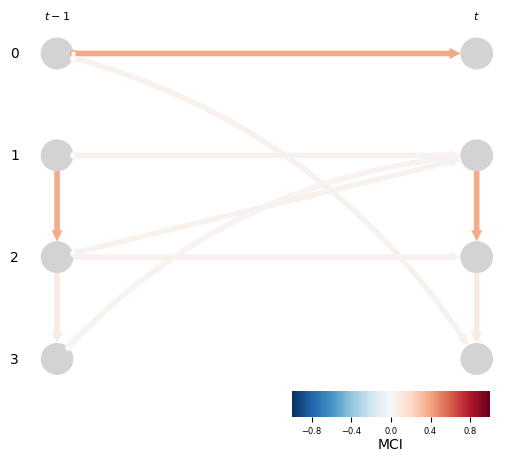

In [ ]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)
lpcmci_loc = LPCMCI(
    dataframe=data, 
    cond_ind_test=cmi_knn,
    verbosity=1)
results = lpcmci_loc.run_lpcmci(tau_max=1, pc_alpha=.2, n_preliminary_iterations = 1)
tp.plot_time_series_graph(graph=results['graph'],
                          val_matrix=results['val_matrix'], save_name = "parcorr_simulated_nolinkass.png")

In [ ]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)
lpcmci_loc = LPCMCI(
    dataframe=data, 
    cond_ind_test=cmi_knn,
    verbosity=1)
results = lpcmci_loc.run_lpcmci(tau_max=1, pc_alpha=.05, n_preliminary_iterations = 1)
tp.plot_time_series_graph(graph=results['graph'],
                          val_matrix=results['val_matrix'], save_name = "parcorr_simulated_nolinkass.png")


Starting preliminary phase  1

Starting test phase

p = 0
(3,-1) independent (3, 0) given () union set()
Writing:   (3,-1) oL> (3, 0) ==> (3,-1)     (3, 0) 
(0, 0) independent (1, 0) given () union set()
(0, 0) independent (1, 0) given () union set()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import numpy as np
from statsmodels.tsa.stattools import adfuller,kpss
import pandas as pd
from matplotlib import pyplot as plt
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
from statsmodels.tools.sm_exceptions import InterpolationWarning
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.lpcmci import LPCMCI
import seaborn as sns
from tqdm import tqdm
import time

def compute_f1_score(ground_truth, predicted):
    # Define equivalences for causal relationships
    equivalences = {
        '-->': '-?>',
        '<--': '<?-',
        'o-o': {'<-o', 'o->', '<->'}
    }
    
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    # Iterate through the arrays and compare relationships
    for i in range(ground_truth.shape[0]):
        for j in range(ground_truth.shape[1]):
            ground_relation = ground_truth[i][j]
            predicted_relation = predicted[i][j]
            
            if ground_relation == '' and predicted_relation == '':
                # No relation, skip
                continue
            elif ground_relation == predicted_relation:
                true_positives += 1
            elif ground_relation in equivalences:
                # Check if predicted relation matches any of the equivalences
                if predicted_relation in equivalences[ground_relation] if isinstance(equivalences[ground_relation], set) else predicted_relation == equivalences[ground_relation]:
                    true_positives += 1
                else:
                    false_positives += 1
            else:
                # If the predicted relation doesn't match the ground truth, it's a false positive
                if predicted_relation != '':
                    false_positives += 1
                # Missed causal link in the predicted array -> false negative
                if ground_relation != '':
                    false_negatives += 1

    # Calculate precision, recall, and F1 score
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return f1_score


def extract_cmi(graphical_array, values_array):
    # List to store conditional mutual information (CMI) values
    cmi_values = []
    
    # Define valid causal links in the graphical array
    valid_arrows = {'-->', '<--', 'o-o', '-?>', '<?-', '<->', 'o->', '<-o'}
    
    # Iterate through both arrays to extract CMI values where there are causal arrows
    for i in range(graphical_array.shape[0]):
        for j in range(graphical_array.shape[1]):
            ground_relation = graphical_array[i][j]
            value_pair = values_array[i][j]
            
            # Check if the relationship is a valid causal arrow
            if ground_relation in valid_arrows:
                for value in value_pair:
                    # Only consider finite values (exclude inf and -inf)
                    if np.isfinite(value):
                        cmi_values.append(value)
    
    # Compute the average of the collected CMI values
    if len(cmi_values) > 0:
        avg_cmi = np.mean(cmi_values)
    else:
        avg_cmi = 0  # No valid values to average
    
    return avg_cmi


def latent_link_recall(ground_truth, predicted):
    # Define valid latent causal links
    latent_links = {'o-o', '<-o', 'o->', '<->'}
    
    true_positives = 0
    false_negatives = 0
    
    # Iterate through both arrays to compare latent links
    for i in range(ground_truth.shape[0]):
        for j in range(ground_truth.shape[1]):
            ground_relation = ground_truth[i][j]
            predicted_relation = predicted[i][j]
            
            # Check for latent links in the ground truth
            if ground_relation in latent_links:
                if predicted_relation in latent_links:
                    true_positives += 1  # Correctly identified latent link
                else:
                    false_negatives += 1  # Latent link missed by the prediction
    
    # Calculate recall
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    
    return recall

def feature_selection_lpcmci(data, gt = None, lag=1, test_size=0.2, random_state=42, alpha=0.05, n_shuffles=100):

        def create_lagged_features(df, column, lags):
            lagged_df = pd.DataFrame()
            lagged_df[column] = df[column]  # Include the original unlagged version
            for lag in range(1, lags + 1):
                lagged_df[f'{column}_lag{lag}'] = df[column].shift(lag)
            lagged_df.dropna()
            return lagged_df


        def shuffle_column(df, column):
            shuffled_df = df.copy()
            shuffled_df = shuffled_df[[column]]
            shuffled_df[column] = np.random.permutation(df[column].values)
            return shuffled_df


        def evaluate_significance(m_real, m_shuffles, alpha):
            mu, sigma = norm.fit(m_shuffles)
            p_value = norm.cdf(m_real, mu, sigma)
            return p_value < alpha


        def calculate_sma(series, window):
            return series.rolling(window=window, min_periods=1).mean()


        # Initialize the dictionary
        num_vars = data.shape[1]
        link_assumptions = {j: {(i, -tau): '' for i in range(num_vars) for tau in range(2) if (i, -tau) != (j, 0)} for j in range(num_vars)}

        start = time.time()
        for target in data.columns:
            potential_drivers = [col for col in data.columns]
            window = round(len(data) * .2)


            sma_baseline = calculate_sma(data[target], window).dropna()
            aligned_data = data.iloc[window-1:].reset_index(drop=True)


            sma_baseline = sma_baseline.reset_index(drop=True)
            y_baseline = aligned_data[target].reset_index(drop=True)


            not_nan_index = y_baseline.dropna().index
            sma_baseline = sma_baseline.loc[not_nan_index]
            y_baseline = y_baseline.dropna()


            X_baseline = sma_baseline.to_frame()


            X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size=test_size, random_state=random_state)
            baseline_model = RandomForestRegressor(random_state=random_state)
            baseline_model.fit(X_train, y_train)
            baseline_predictions = baseline_model.predict(X_test)
            current_baseline_mse = mean_squared_error(y_test, baseline_predictions)


            definite_drivers = []
            discovered_drivers = []
            definite_non_drivers = []
            aligned_data = data.dropna()
            combined_features_ = pd.DataFrame()


            while potential_drivers:
                current_driver = potential_drivers.pop(0)
                driver_lagged = create_lagged_features(aligned_data, current_driver, lag).dropna()
                best_mse = current_baseline_mse
                best_lag = None
            
                for lag_num in tqdm(range(0, lag + 1), desc=f'Evaluating {current_driver} lags'):
                    if lag_num == 0 and current_driver == target:
                        continue
                    elif lag_num == 0:
                        current_driver_lagged = driver_lagged[[current_driver]]
                    else:
                        current_driver_lagged = driver_lagged[[f'{current_driver}_lag{lag_num}']]
                    
                    combined_features = pd.concat([combined_features_, current_driver_lagged], axis=1)
                    target_column = aligned_data[target].loc[combined_features.index]
                    X_train, X_test, y_train, y_test = train_test_split(combined_features, target_column, test_size=test_size, random_state=random_state)
                    combined_model = RandomForestRegressor(random_state=random_state)
                    combined_model.fit(X_train, y_train)
                
                    combined_predictions = combined_model.predict(X_test)
                    combined_mse = mean_squared_error(y_test, combined_predictions)
                    if combined_mse < best_mse:
                        best_mse = combined_mse
                        best_lag = lag_num
                
                if best_lag is not None:
                    shuffle_mse = []
                    for _ in range(n_shuffles):
                        if best_lag == 0:
                            shuffled_data = shuffle_column(driver_lagged, current_driver)
                        else:
                            shuffled_data = shuffle_column(driver_lagged, f'{current_driver}_lag{best_lag}')
                        shuffled_features = pd.concat([combined_features_, shuffled_data], axis=1).dropna()
                        X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(shuffled_features, target_column, test_size=test_size, random_state=random_state)
                        shuffled_model = RandomForestRegressor(random_state=random_state)
                        shuffled_model.fit(X_train_shuffled, y_train_shuffled)
                    
                        shuffled_predictions = shuffled_model.predict(X_test_shuffled)
                        shuffle_mse.append(mean_squared_error(y_test_shuffled, shuffled_predictions))
                
                    if evaluate_significance(best_mse, shuffle_mse, alpha):
                        if best_lag == 0:
                            definite_drivers.append(current_driver)
                        else:
                            definite_drivers.append(f'{current_driver}_lag{best_lag}')
                        current_baseline_mse = best_mse
                        combined_features_ = pd.concat([combined_features_, current_driver_lagged], axis=1)
                    else:
                        discovered_drivers.append(current_driver if best_lag == 0 else f'{current_driver}_lag{best_lag}')
                else:
                    definite_non_drivers.append(current_driver)

            print(f"Target: {target}")
            print(f"Definite Drivers: {definite_drivers}")
            print(f"Discovered Drivers: {discovered_drivers}")
            print(f"Definite Non-Drivers: {definite_non_drivers}")
            print(f"Final Baseline MSE: {current_baseline_mse}")

            # Update link_assumptions dictionary
            target_idx = data.columns.get_loc(target)
            for driver in definite_drivers:
                if '_lag' in driver:
                    driver_name, lag_value = driver.rsplit('_lag', 1)
                    driver_idx = data.columns.get_loc(driver_name)
                    lag_value = -int(lag_value)
                    link_assumptions[target_idx][(driver_idx, lag_value)] = '-->'
                else:
                    driver_idx = data.columns.get_loc(driver)
                    link_assumptions[target_idx][(driver_idx, 0)] = '-->'
                    link_assumptions[driver_idx][(target_idx, 0)] = '<--'

            for driver in discovered_drivers:
                if '_lag' in driver:
                    driver_name, lag_value = driver.rsplit('_lag', 1)
                    driver_idx = data.columns.get_loc(driver_name)
                    lag_value = -int(lag_value)
                    link_assumptions[target_idx][(driver_idx, lag_value)] = '-?>'
                else:
                    driver_idx = data.columns.get_loc(driver)
                    link_assumptions[target_idx][(driver_idx, 0)] = '-?>'
                    link_assumptions[driver_idx][(target_idx, 0)] = '<?-'

        for target in data.columns:
            target_idx = data.columns.get_loc(target)
            for driver in discovered_drivers + definite_drivers:
                if '_lag' in driver:
                    driver_name, lag_value = driver.rsplit('_lag', 1)
                    lag_value = -int(lag_value)
                    driver_idx = data.columns.get_loc(driver_name)
                    if target_idx != driver_idx: 
                        if link_assumptions[driver_idx][(target_idx, lag_value)] in ['-?>', '-->'] and link_assumptions[target_idx][(driver_idx, lag_value)] in ['<?-', '<--']:
                            link_assumptions[target_idx][(driver_idx, 0)] = 'o?o'
                            link_assumptions[driver_idx][(target_idx, 0)] = 'o?o'
                else: 
                    driver_idx = data.columns.get_loc(driver)
                    if target_idx != driver_idx: 
                        if link_assumptions[driver_idx][(target_idx, 0)] in ['-?>', '-->'] and link_assumptions[target_idx][(driver_idx, 0)] in ['<?-', '<--']:
                            link_assumptions[target_idx][(driver_idx, 0)] = 'o?o'
                            link_assumptions[driver_idx][(target_idx, 0)] = 'o?o'
        print(link_assumptions)
        n_a_n = np.isnan(data).any(axis=1)
        data[n_a_n] = 999
        data = data.values
        data = pp.DataFrame(data, var_names = ["y0", "y1", "y2", "y3", "y4"], missing_flag = 999)
        cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)
        print("Starting LPCMCI...")
        lpcmci_loc = LPCMCI(
            dataframe=data, 
            cond_ind_test=cmi_knn,
            verbosity=0)
        results = lpcmci_loc.run_lpcmci(tau_max=1, pc_alpha=.2, link_assumptions = link_assumptions, n_preliminary_iterations = 0)
        end = time.time()
        #tp.plot_time_series_graph(graph=results['graph'],
        #                        val_matrix=results['val_matrix'])
        if gt == None:
            f1 = 0
        else:
            f1 = compute_f1_score(gt, results['graph'])

        cmi_val = extract_cmi(results['graph'], results['val_matrix'])
        recall_latent = latent_link_recall(gt, results['graph'])
        elapsed_time = end - start
        print("Finished.")
        return results, elapsed_time, f1, cmi_val, recall_latent
dat = pd.read_csv('/home/gnicolaou/tigramite/tutorials/causal_discovery/data.csv')
result = feature_selection_lpcmci(dat)
print(result)


Evaluating 0 lags: 100%|██████████| 2/2 [00:00<00:00, 20.76it/s]


      0_lag1
1   66.21673
2  200.73140
3   24.65150
4  159.60626
5   12.18114
1    200.73140
2     24.65150
3    159.60626
4     12.18114
5    270.90903
Name: 0, dtype: float64


KeyboardInterrupt: 